Importing training data set

In [1]:
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv

--2021-04-29 01:47:07--  https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv
Resolving lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to lead-files.nyc3.cdn.digitaloceanspaces.com (lead-files.nyc3.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20119550 (19M) [text/csv]
Saving to: ‘Training Data.csv.1’

Training Data.csv.1 100%[===================>]  19.19M  --.-KB/s    in 0.05s   

2021-04-29 01:47:07 (390 MB/s) - ‘Training Data.csv.1’ saved [20119550/20119550]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df=pd.read_csv("Training Data.csv");

In [4]:
df.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [5]:
df.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [6]:
df.head(5)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Label Encoding

In [7]:
#df.colname.unique()

car_ownership  = {'yes':1,'no':0} 
df.car_ownership = [car_ownership[item] for item in df.car_ownership] 

married  = {'single': 0,'married': 1} 
df.married = [married[item] for item in df.married]

le_house_ownership = preprocessing.LabelEncoder() 
le_profession=preprocessing.LabelEncoder() 
le_city=preprocessing.LabelEncoder()
le_state=preprocessing.LabelEncoder()

df['house_ownership']= le_house_ownership.fit_transform(df['house_ownership']) 
df['profession']= le_profession.fit_transform(df['profession']) 
df['city']= le_city.fit_transform(df['city']) 
df['state']= le_state.fit_transform(df['state']) 
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,0,2,0,33,251,13,3,13,0
1,2,7574516,40,10,0,2,0,43,227,14,9,13,0
2,3,3991815,66,4,1,2,0,47,8,12,4,10,0
3,4,6256451,41,2,0,2,1,43,54,17,2,12,1
4,5,5768871,47,11,0,2,0,11,296,22,3,14,1


Checking if dataset is unbalnced or not

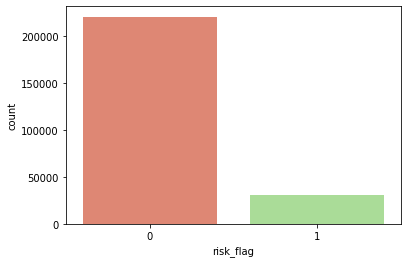

In [8]:
sns.countplot(x ='risk_flag', data = df,  palette = ['#EF7C63','#A4E78D'])
plt.rcParams['figure.figsize']=(8,6)
plt.show()

Smote SVM

In [9]:

X=df.drop(['risk_flag','Id'], axis = 1) 
y=df['risk_flag'] 

In [ ]:
svmsmote = SVMSMOTE(random_state = 101)
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X, y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample_svm, y_oversample_svm   , test_size = 0.2)

Randome Forest Classifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

#Train 
clf.fit(X_train,y_train)

# prediction
y_pred=clf.predict(X_test)

In [ ]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Data Prediction

In [ ]:
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv

testdf=pd.read_csv("Test Data.csv");
testdf.head()

In [ ]:
#Label Encoding for test
#df.colname.unique()

car_ownership  = {'yes':1,'no':0} 
testdf.car_ownership = [car_ownership[item] for item in testdf.car_ownership] 

married  = {'single': 0,'married': 1} 
testdf.married = [married[item] for item in testdf.married]


le_house_ownership = preprocessing.LabelEncoder() 
le_profession=preprocessing.LabelEncoder() 
le_city=preprocessing.LabelEncoder()
le_state=preprocessing.LabelEncoder()

testdf['house_ownership']= le_house_ownership.fit_transform(testdf['house_ownership']) 
testdf['profession']= le_profession.fit_transform(testdf['profession']) 
testdf['city']= le_city.fit_transform(testdf['city']) 
testdf['state']= le_state.fit_transform(testdf['state']) 
testdf.head()

In [ ]:
X_df=testdf.drop(['id'], axis = 1) 
ids=testdf["id"]

Predictions

In [ ]:
predictions_test_df = clf.predict(X_df)
submission_lr = pd.DataFrame(list(zip(ids.tolist(), predictions_test_df)), 
               columns =['id', 'risk_flag']) 
submission_lr.to_csv("rf_smote.csv",index=False)
from google.colab import files
files.download('/content/rf_smote.csv') 